In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import os
from collections import Counter
## !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
churn  = pd.read_excel('Customer Churn Data.xlsx', sheet_name = 'Data for DSBA')

In [3]:
churn.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [4]:
churn.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [6]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [7]:
churn[churn.isnull().sum()[churn.isnull().sum()>0].index].dtypes

Tenure                   object
City_Tier               float64
CC_Contacted_LY         float64
Payment                  object
Gender                   object
Service_Score           float64
Account_user_count       object
account_segment          object
CC_Agent_Score          float64
Marital_Status           object
rev_per_month            object
Complain_ly             float64
Day_Since_CC_connect     object
cashback                 object
Login_device             object
dtype: object

In [8]:
churn.describe()

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.00000,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,25629.50000,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,3250.62635,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,20000.00000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,22814.75000,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,25629.50000,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,28444.25000,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,31259.00000,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


In [9]:
churn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print("No. of rows: ",churn.shape[0], "\n""No. of columns: ",churn.shape[1])

No. of rows:  11260 
No. of columns:  19


In [11]:
dups = churn.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
churn[dups]

Number of duplicate rows = 0


,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [12]:
churn = churn.drop('AccountID', axis=1)

In [13]:
churn.head(10)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
5,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139.19,Computer
6,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,120.86,Mobile
7,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,122.93,Mobile
8,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,126.83,Mobile
9,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,122.93,Mobile


In [14]:
churn.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [15]:
((churn.isnull() | churn.isna()).sum() * 100 / churn.index.size).round(2)

Churn                      0.00
Tenure                     0.91
City_Tier                  0.99
CC_Contacted_LY            0.91
Payment                    0.97
Gender                     0.96
Service_Score              0.87
Account_user_count         0.99
account_segment            0.86
CC_Agent_Score             1.03
Marital_Status             1.88
rev_per_month              0.91
Complain_ly                3.17
rev_growth_yoy             0.00
coupon_used_for_payment    0.00
Day_Since_CC_connect       3.17
cashback                   4.18
Login_device               1.96
dtype: float64

In [16]:
cat=[]
num=[]
for i in churn.columns:
    if churn[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['Tenure', 'Payment', 'Gender', 'Account_user_count', 'account_segment', 'Marital_Status', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback', 'Login_device']
['Churn', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'CC_Agent_Score', 'Complain_ly']


In [17]:
churn[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.0,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.0,3.0,4.0,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.0,0.0,1.0,1.0


In [18]:
churn[cat].describe().T

,count,unique,top,freq
Tenure,11158,38,1,1351
Payment,11151,5,Debit Card,4587
Gender,11152,4,Male,6328
Account_user_count,11148,7,4,4569
account_segment,11163,7,Super,4062
Marital_Status,11048,3,Married,5860
rev_per_month,11158,59,3,1746
rev_growth_yoy,11260,20,14,1524
coupon_used_for_payment,11260,20,1,4373
Day_Since_CC_connect,10903,24,3,1816


In [19]:
for column in churn.columns:
    if churn[column].dtype == 'object':
        print(column.upper(),': ',churn[column].nunique())
        print(churn[column].value_counts().sort_values())
        print('\n')

TENURE :  38
61       2
50       2
51       2
60       2
31      96
29     114
25     114
#      116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: Tenure, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6328
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Pl

In [20]:
hpIsDigit = pd.DataFrame(
    churn.Tenure.str.isdigit()
)  # if the string is made of digits store True else False

# print the entries where isdigit = False
churn[hpIsDigit["Tenure"] == False]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
12,1,#,1.0,11.0,Cash on Delivery,Male,2.0,3,Regular Plus,3.0,Single,2,1.0,13,2,2,134.41,Mobile
15,1,#,2.0,12.0,UPI,Male,3.0,3,Regular Plus,5.0,Married,5,1.0,22,1,2,120.73,Mobile
575,1,#,1.0,8.0,Cash on Delivery,Male,2.0,3,Regular Plus,3.0,Single,5,0.0,24,1,0,124.79,Mobile
754,0,#,3.0,13.0,E wallet,Male,2.0,1,Super,2.0,Married,1,1.0,18,0,9,152.2,Mobile
979,0,#,1.0,15.0,Debit Card,Male,3.0,1,Regular Plus,3.0,Married,7,0.0,18,1,0,124.51,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10998,0,#,1.0,15.0,Credit Card,Male,3.0,5,Super,1.0,Married,5,0.0,17,1,14,169.86,Mobile
11057,0,#,3.0,24.0,Debit Card,Male,3.0,4,Super,3.0,Married,7,1.0,16,2,8,170.01,Computer
11150,0,#,1.0,18.0,Credit Card,Female,4.0,2,Regular Plus,3.0,Married,12,0.0,14,2,3,168.78,Mobile
11157,0,#,1.0,12.0,Cash on Delivery,Male,3.0,4,Regular Plus,4.0,Married,3,0.0,13,1,3,152.26,Mobile


In [21]:
hpIsDigit = pd.DataFrame(
    churn.Account_user_count.str.isdigit()
)  # if the string is made of digits store True else False

# print the entries where isdigit = False
churn[hpIsDigit["Account_user_count"] == False]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
88,0,24,1.0,14.0,Debit Card,Male,2.0,@,HNI,4.0,Divorced,+,0.0,16,1,7,224.9,&&&&
110,0,16,3.0,22.0,E wallet,Female,3.0,@,Super +,2.0,Divorced,+,1.0,22,0,9,260.64,&&&&
170,0,15,3.0,32.0,E wallet,Female,3.0,@,Super +,4.0,Divorced,+,0.0,14,2,8,235.25,&&&&
216,0,11,1.0,21.0,Debit Card,Male,3.0,@,HNI,2.0,Married,+,1.0,14,1,9,215.1,&&&&
241,1,4,3.0,10.0,E wallet,Male,2.0,@,Super,4.0,Single,+,0.0,18,7,7,193.55,&&&&
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11109,0,6,3.0,20.0,E wallet,Male,4.0,@,Super,1.0,Single,+,0.0,16,1,1,176.48,&&&&
11155,1,1,3.0,34.0,Cash on Delivery,Male,3.0,@,Regular +,5.0,Single,+,0.0,19,1,1,141.91,&&&&
11159,1,1,3.0,25.0,E wallet,Female,3.0,@,Super,3.0,Single,+,1.0,14,1,3,223.54,&&&&
11168,0,16,3.0,21.0,E wallet,Male,4.0,@,Super,1.0,Married,+,1.0,15,2,1,180.87,&&&&


In [22]:
hpIsDigit = pd.DataFrame(
    churn.rev_per_month.str.isdigit()
)  # if the string is made of digits store True else False

# print the entries where isdigit = False
churn[hpIsDigit["rev_per_month"] == False]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
19,1,19,1.0,20.0,Debit Card,Female,3.0,3,Regular +,4.0,Divorced,+,NaN,18,1,3,149.63,Mobile
38,0,30,1.0,30.0,Debit Card,Male,2.0,2,HNI,2.0,Married,+,NaN,16,1,4,194.39,Mobile
60,0,6,1.0,20.0,Credit Card,Female,3.0,3,Regular +,4.0,Divorced,+,NaN,13,0,6,127.56,Mobile
65,0,25,1.0,6.0,Debit Card,Male,3.0,4,Regular,3.0,Divorced,+,NaN,14,1,9,299.99,Mobile
88,0,24,1.0,14.0,Debit Card,Male,2.0,@,HNI,4.0,Divorced,+,0.0,16,1,7,224.9,&&&&
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,0,16,1.0,37.0,Debit Card,Male,3.0,5,Super,3.0,Single,+,NaN,13,4,8,171.32,Computer
11197,0,1,1.0,10.0,Debit Card,Male,3.0,@,Super,3.0,Single,+,0.0,15,2,3,175.17,&&&&
11203,0,1,1.0,13.0,UPI,Male,3.0,4,Regular +,3.0,Married,+,NaN,20,1,3,170.77,Mobile
11227,0,13,1.0,20.0,Debit Card,Male,3.0,4,Regular,1.0,Single,+,NaN,15,2,4,325.31,Computer


In [23]:
churn['Tenure'] = churn['Tenure'].replace('#',np.NaN)
churn['Account_user_count'] = churn['Account_user_count'].replace('@',np.NaN)
churn['rev_per_month'] = churn['rev_per_month'].replace('+',np.NaN)
churn['Login_device'] = churn['Login_device'].replace('&&&&',np.NaN)
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].replace('$',np.NaN)
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('$',np.NaN)
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('#',np.NaN)
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('*',np.NaN)
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].replace('$',np.NaN)
churn['cashback'] = churn['cashback'].replace('$',np.NaN)

In [24]:
churn['Tenure'].unique()

array([ 4.,  0.,  2., 13., 11., nan,  9., 99., 19., 20., 14.,  8., 26.,
       18.,  5., 30.,  7.,  1., 23.,  3., 29.,  6., 28., 24., 25., 16.,
       10., 15., 22., 27., 12., 21., 17., 50., 60., 31., 51., 61.])

In [25]:
churn['Account_user_count'].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [26]:
churn['rev_per_month'].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [27]:
churn['Login_device'].unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [28]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [29]:
churn['rev_growth_yoy'].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [30]:
churn['coupon_used_for_payment'].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

In [31]:
churn['Day_Since_CC_connect'].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [32]:
churn['cashback'].unique()

array([159.93, 120.9 ,    nan, ..., 227.36, 226.91, 191.42])

In [33]:
 churn["Churn"].value_counts(normalize = True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

Dataset is highly imbalanced.

In [34]:
churn["Gender"]=churn["Gender"].replace('F','Female')
churn["Gender"]=churn["Gender"].replace('M','Male')
churn["account_segment"]=churn["account_segment"].replace('Super +','Super Plus')
churn["account_segment"]=churn["account_segment"].replace('Regular +','Regular Plus')

In [35]:
churn.head(20)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile
1,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
2,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
3,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
4,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile
5,1,0.0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2.0,1.0,22.0,4.0,7.0,139.19,Computer
6,1,2.0,3.0,11.0,Cash on Delivery,Male,2.0,3.0,Super,2.0,Divorced,4.0,0.0,14.0,0.0,0.0,120.86,Mobile
7,1,0.0,1.0,6.0,Credit Card,Male,3.0,3.0,Regular Plus,2.0,Divorced,3.0,1.0,16.0,2.0,0.0,122.93,Mobile
8,1,13.0,3.0,9.0,E wallet,Male,2.0,4.0,Regular Plus,3.0,Divorced,2.0,1.0,14.0,0.0,2.0,126.83,Mobile
9,1,0.0,1.0,31.0,Debit Card,Male,2.0,5.0,Regular Plus,3.0,Single,2.0,0.0,12.0,1.0,1.0,122.93,Mobile


<AxesSubplot:>

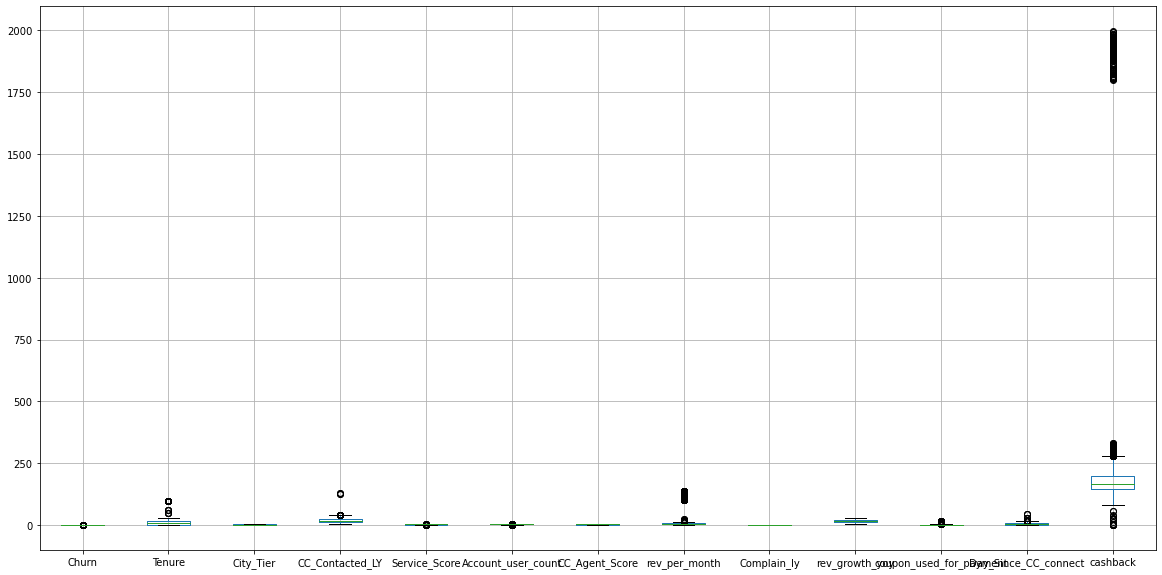

In [36]:
churn.boxplot(figsize=(20,10))

In [37]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [38]:
lrtravel,urtravel=remove_outlier(churn['Tenure'])
churn['Tenure']=np.where(churn['Tenure']>urtravel,urtravel,churn['Tenure'])
churn['Tenure']=np.where(churn['Tenure']<lrtravel,lrtravel,churn['Tenure'])

lrtravel,urtravel=remove_outlier(churn['CC_Contacted_LY'])
churn['CC_Contacted_LY']=np.where(churn['CC_Contacted_LY']>urtravel,urtravel,churn['CC_Contacted_LY'])
churn['CC_Contacted_LY']=np.where(churn['CC_Contacted_LY']<lrtravel,lrtravel,churn['CC_Contacted_LY'])

lrtravel,urtravel=remove_outlier(churn['Service_Score'])
churn['Service_Score']=np.where(churn['Service_Score']>urtravel,urtravel,churn['Service_Score'])
churn['Service_Score']=np.where(churn['Service_Score']<lrtravel,lrtravel,churn['Service_Score'])

lrtravel,urtravel=remove_outlier(churn['Account_user_count'])
churn['Account_user_count']=np.where(churn['Account_user_count']>urtravel,urtravel,churn['Account_user_count'])
churn['Account_user_count']=np.where(churn['Account_user_count']<lrtravel,lrtravel,churn['Account_user_count'])

lrmiles,urmiles=remove_outlier(churn['rev_per_month'])
churn['rev_per_month']=np.where(churn['rev_per_month']>urmiles,urmiles,churn['rev_per_month'])
churn['rev_per_month']=np.where(churn['rev_per_month']<lrmiles,lrmiles,churn['rev_per_month'])

churn.shape

(11260, 18)

# Make Boxplots after Outlier Treatment

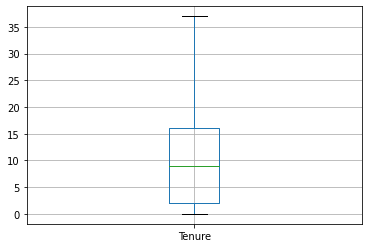

In [39]:
churn.boxplot(column=['Tenure'])
plt.show()

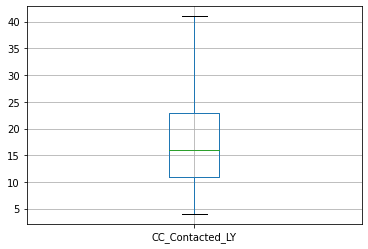

In [40]:
churn.boxplot(column=['CC_Contacted_LY'])
plt.show()

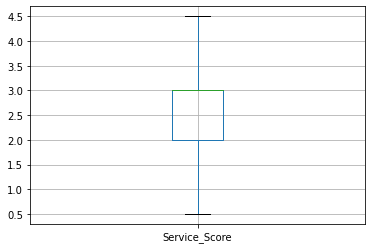

In [41]:
churn.boxplot(column=['Service_Score'])
plt.show()

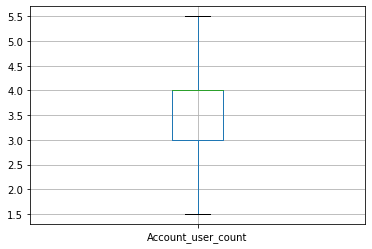

In [42]:
churn.boxplot(column=['Account_user_count'])
plt.show()

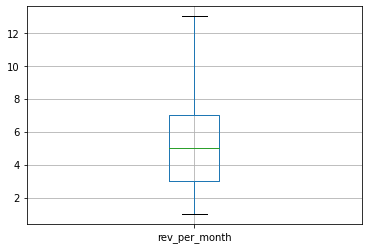

In [43]:
churn.boxplot(column=['rev_per_month'])
plt.show()

<AxesSubplot:>

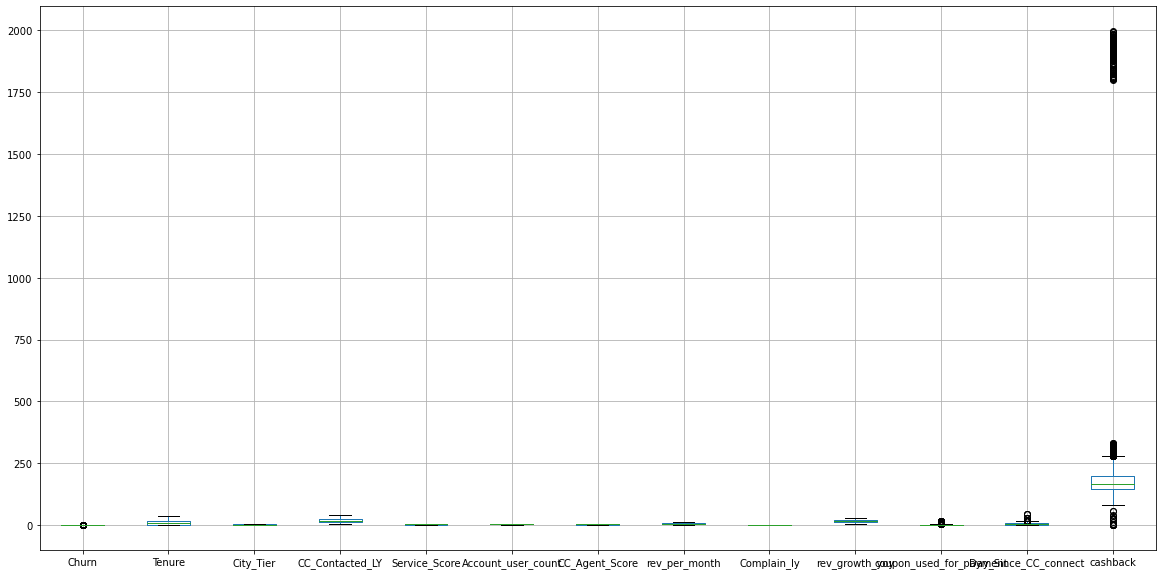

In [44]:
churn.boxplot(figsize=(20,10))

# Check for missing value

In [45]:
churn.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [46]:
churn.isnull().sum()[churn.isnull().sum()>0]

Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [47]:
churn[churn.isnull().sum()[churn.isnull().sum()>0].index].dtypes

Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

In [48]:
churn['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [49]:
churn['Payment'].value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [50]:
churn['Service_Score'].value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.5       8
4.5       5
Name: Service_Score, dtype: int64

In [51]:
churn['Gender'].value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [52]:
churn['Marital_Status'].value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [53]:
churn['Day_Since_CC_connect'].value_counts()

3.0     1816
2.0     1574
1.0     1256
8.0     1169
0.0      964
7.0      911
4.0      893
9.0      622
5.0      479
10.0     339
6.0      229
11.0     183
12.0     146
13.0     117
14.0      74
15.0      37
17.0      34
16.0      26
18.0      26
30.0       2
31.0       2
47.0       2
46.0       1
Name: Day_Since_CC_connect, dtype: int64

# Imputing missing values

Since, Complain_ly is binary, we cannot substitute with mean values for this variable. We will impute this variable with it's respective modal value.

#No Outliers so imputed the null value with mean

In [54]:
churn["City_Tier"].fillna(churn["City_Tier"].mean(),inplace=True) 
churn["CC_Agent_Score"].fillna(churn["CC_Agent_Score"].mean(),inplace=True)

In [55]:
churn.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                    0
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score               0
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [56]:
##Replacing NULL values in Categorical Columns using Mode

In [57]:
for column in ['Payment','Gender','account_segment','Marital_Status','Day_Since_CC_connect','cashback','Complain_ly','Login_device']:
    churn[column].fillna(churn[column].mode()[0], inplace=True)

In [58]:
churn.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                    0
CC_Contacted_LY            102
Payment                      0
Gender                       0
Service_Score               98
Account_user_count         444
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month              791
Complain_ly                  0
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect         0
cashback                     0
Login_device                 0
dtype: int64

In [59]:
##Outliers are present so imputed the null value with median

In [60]:
impute=['Tenure','CC_Contacted_LY','Service_Score','Account_user_count','rev_growth_yoy','coupon_used_for_payment','rev_per_month']

In [61]:
for i in impute:
    churn[i].fillna(churn[i].median(),inplace=True)

In [62]:
churn.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [63]:
cat=[]
num=[]
for i in churn.columns:
    if churn[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']
['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']


# Univariate Analysis

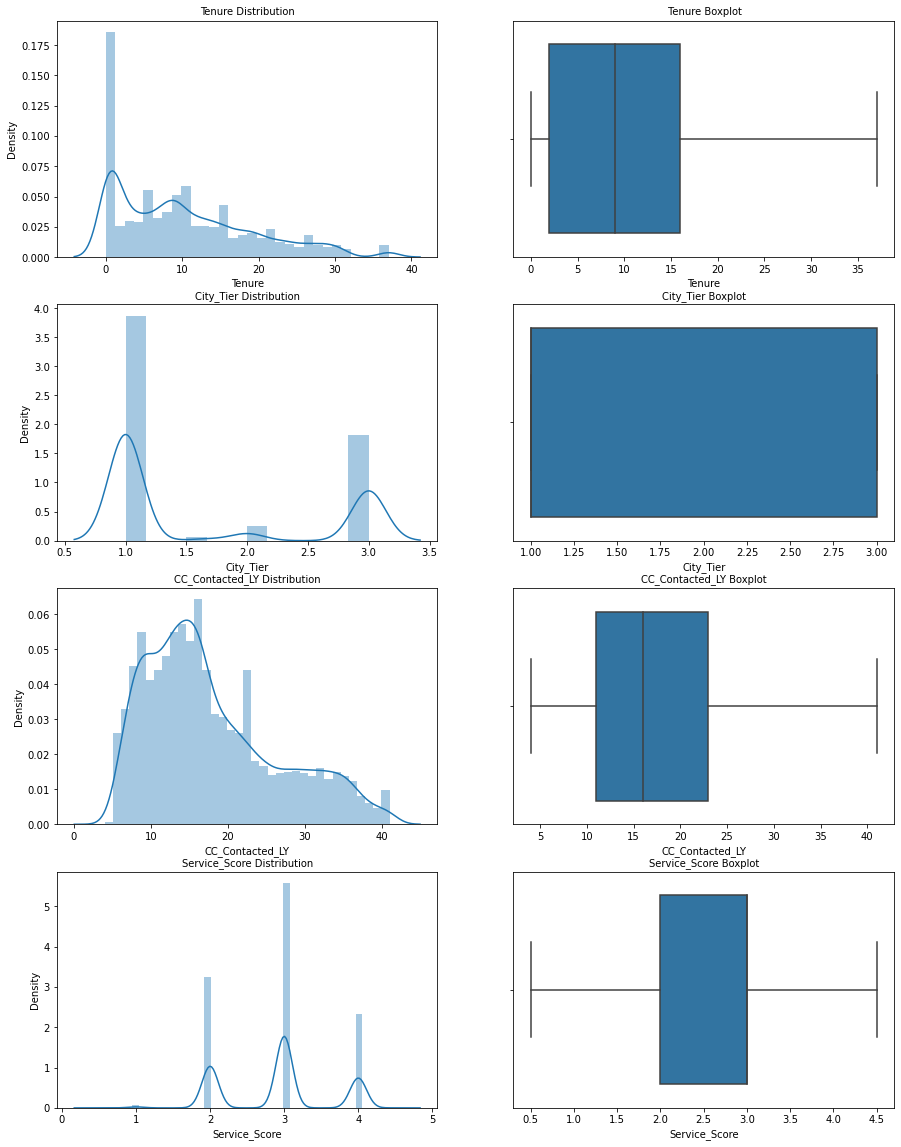

In [64]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,20)
a = sns.distplot(churn['Tenure'] , ax=axes[0][0])
a.set_title("Tenure Distribution",fontsize=10)

a = sns.boxplot(churn['Tenure'] , orient = "v" , ax=axes[0][1])
a.set_title(" Tenure Boxplot",fontsize=10)

a = sns.distplot(churn['City_Tier'] , ax=axes[1][0])
a.set_title("City_Tier Distribution",fontsize=10)

a = sns.boxplot(churn['City_Tier'] , orient = "v" , ax=axes[1][1])
a.set_title("City_Tier Boxplot",fontsize=10)


a = sns.distplot(churn['CC_Contacted_LY'] , ax=axes[2][0])
a.set_title("CC_Contacted_LY Distribution",fontsize=10)

a = sns.boxplot(churn['CC_Contacted_LY'] , orient = "v" , ax=axes[2][1])
a.set_title("CC_Contacted_LY Boxplot",fontsize=10)


a = sns.distplot(churn['Service_Score'] , ax=axes[3][0])
a.set_title("Service_Score Distribution",fontsize=10)

a = sns.boxplot(churn['Service_Score'] , orient = "v" , ax=axes[3][1])
a.set_title("Service_Score Boxplot",fontsize=10)


plt.show()

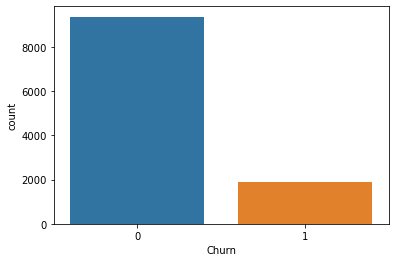

In [65]:
sns.countplot(x='Churn', data=churn);

<AxesSubplot:xlabel='Payment', ylabel='count'>

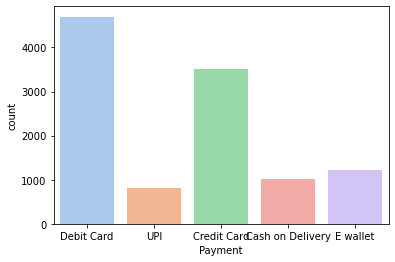

In [66]:
sns.countplot(x='Payment', data=churn, palette='pastel')

<AxesSubplot:xlabel='Gender', ylabel='count'>

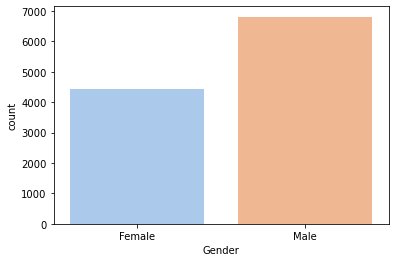

In [67]:
sns.countplot(x='Gender', data=churn, palette='pastel')

<AxesSubplot:xlabel='account_segment', ylabel='count'>

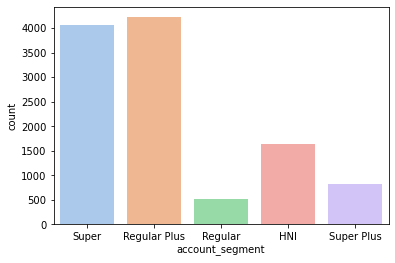

In [68]:
sns.countplot(x='account_segment', data=churn, palette='pastel')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

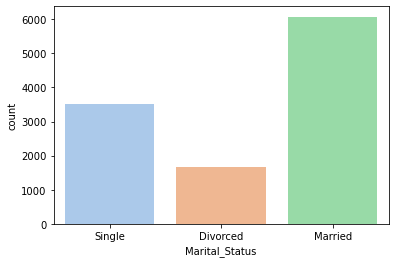

In [69]:
sns.countplot(x='Marital_Status', data=churn, palette='pastel')

<AxesSubplot:xlabel='Login_device', ylabel='count'>

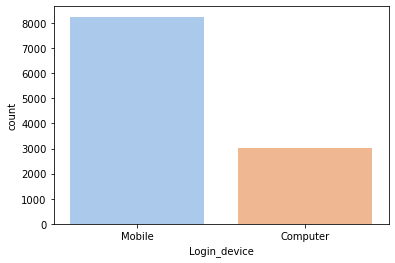

In [70]:
sns.countplot(x='Login_device', data=churn, palette='pastel')

<AxesSubplot:xlabel='Service_Score', ylabel='count'>

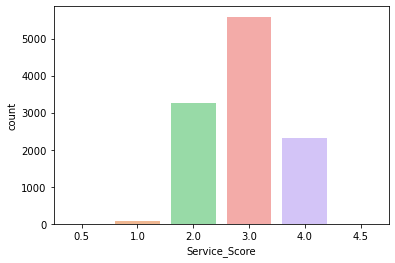

In [71]:
sns.countplot(x='Service_Score', data=churn, palette='pastel')

# Bivariate Analysis

<AxesSubplot:xlabel='Payment', ylabel='count'>

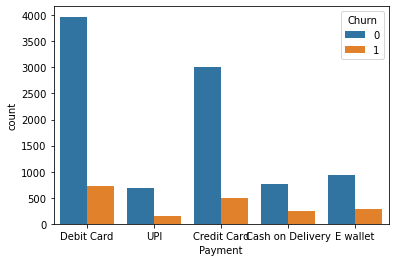

In [72]:
sns.countplot(x='Payment', hue='Churn', data=churn)

<AxesSubplot:xlabel='Gender', ylabel='count'>

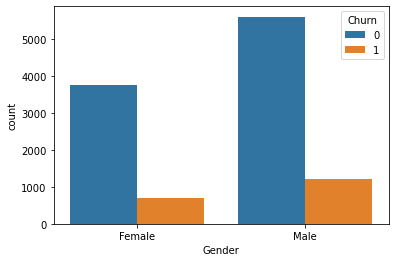

In [73]:
sns.countplot(x='Gender', hue='Churn', data=churn)

<AxesSubplot:xlabel='Service_Score', ylabel='count'>

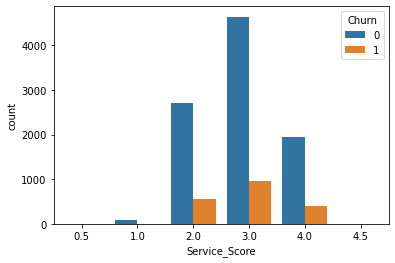

In [74]:
sns.countplot(x='Service_Score', hue='Churn', data=churn)

<AxesSubplot:xlabel='account_segment', ylabel='count'>

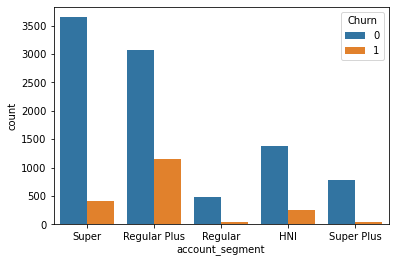

In [75]:
sns.countplot(x='account_segment', hue='Churn', data=churn)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

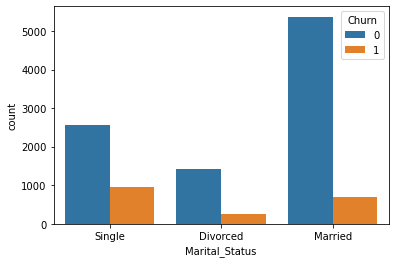

In [76]:
sns.countplot(x='Marital_Status', hue='Churn', data=churn)

<AxesSubplot:xlabel='Login_device', ylabel='count'>

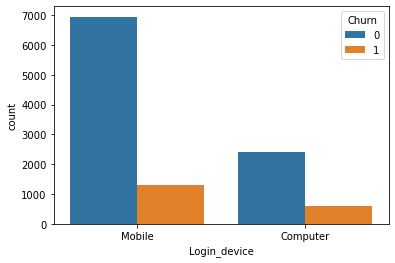

In [77]:
sns.countplot(x='Login_device', hue='Churn', data=churn)

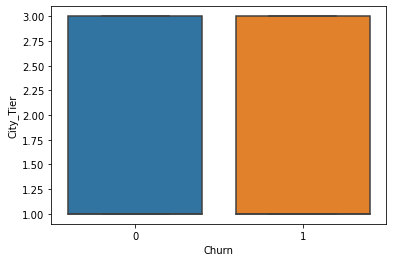

In [78]:
sns.boxplot(churn['Churn'],churn['City_Tier']);

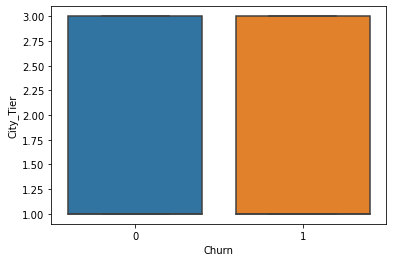

In [79]:
sns.boxplot(churn['Churn'],churn['City_Tier']);

# Multivariate Analysis

<AxesSubplot:xlabel='Churn', ylabel='rev_per_month'>

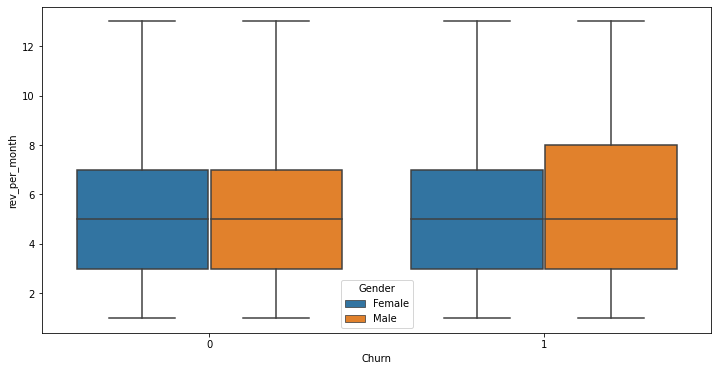

In [80]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Churn', y='rev_per_month', hue='Gender',data=churn)

<AxesSubplot:xlabel='Churn', ylabel='rev_per_month'>

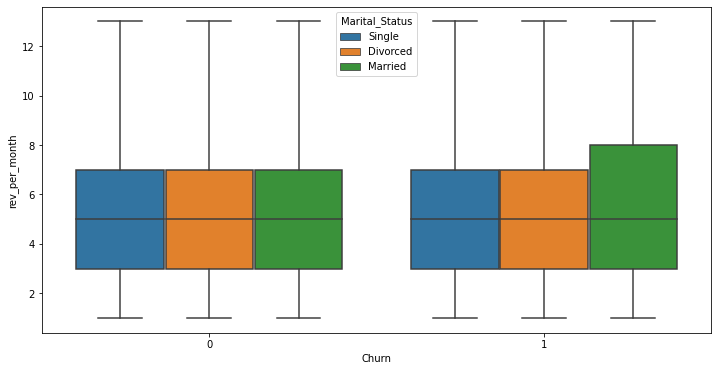

In [81]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Churn', y='rev_per_month', hue='Marital_Status',data=churn)

<AxesSubplot:xlabel='Churn', ylabel='rev_per_month'>

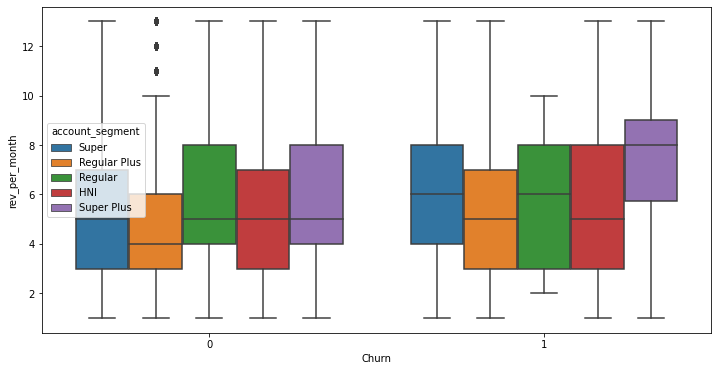

In [82]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Churn', y='rev_per_month', hue='account_segment',data=churn)

In [83]:
corr = churn.corr()
round(corr,2)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
Churn,1.00,-0.33,0.08,0.08,0.01,0.10,0.11,0.04,0.25,-0.01,-0.01,-0.15,-0.03
Tenure,-0.33,1.00,-0.05,-0.02,0.02,-0.01,-0.02,0.19,-0.03,0.02,0.14,0.18,0.12
City_Tier,0.08,-0.05,1.00,0.01,-0.01,0.02,-0.01,-0.03,0.00,-0.03,0.02,0.02,0.01
CC_Contacted_LY,0.08,-0.02,0.01,1.00,0.06,0.02,0.01,0.07,0.03,0.07,0.01,0.02,0.00
Service_Score,0.01,0.02,-0.01,0.06,1.00,0.32,0.03,0.13,0.00,0.10,0.18,0.10,0.04
Account_user_count,0.10,-0.01,0.02,0.02,0.32,1.00,-0.02,0.07,0.00,0.07,0.14,0.04,0.04
CC_Agent_Score,0.11,-0.02,-0.01,0.01,0.03,-0.02,1.00,0.05,-0.03,-0.03,0.03,0.03,-0.01
rev_per_month,0.04,0.19,-0.03,0.07,0.13,0.07,0.05,1.00,-0.02,0.05,0.04,-0.05,0.05
Complain_ly,0.25,-0.03,0.00,0.03,0.00,0.00,-0.03,-0.02,1.00,-0.00,-0.01,-0.04,0.01
rev_growth_yoy,-0.01,0.02,-0.03,0.07,0.10,0.07,-0.03,0.05,-0.00,1.00,0.02,0.00,-0.00


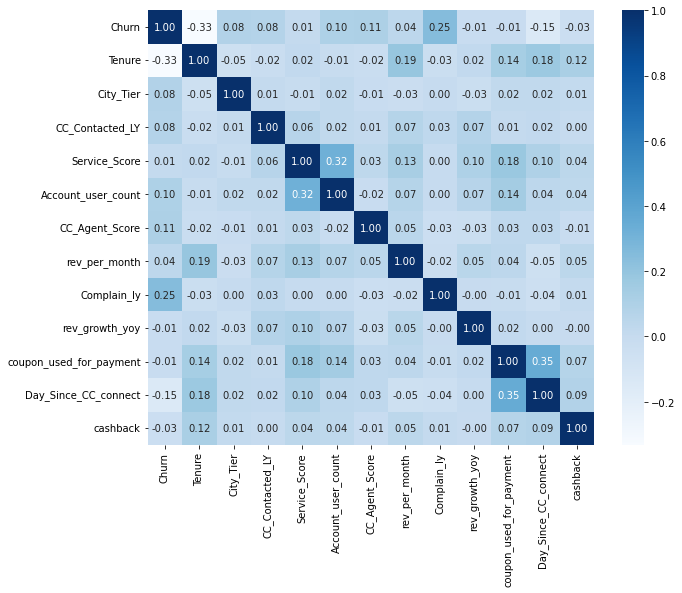

In [84]:
plt.figure(figsize=(10,8))
sns.heatmap(churn.corr(),annot=True, cmap = 'Blues',fmt = '.2f');
plt.show()

In [85]:
cat

['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']

In [86]:
churn.to_csv('km.csv')

In [87]:
churn_df = churn.copy()

In [88]:
churn_df.head(20)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.000000,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile
1,1,0.0,1.000000,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
2,1,0.0,1.000000,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,155.62,Mobile
3,1,0.0,3.000000,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
4,1,0.0,1.000000,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile
5,1,0.0,1.000000,22.0,Debit Card,Female,3.0,4.0,Regular Plus,5.0,Single,2.0,1.0,22.0,4.0,7.0,139.19,Computer
6,1,2.0,3.000000,11.0,Cash on Delivery,Male,2.0,3.0,Super,2.0,Divorced,4.0,0.0,14.0,0.0,0.0,120.86,Mobile
7,1,0.0,1.000000,6.0,Credit Card,Male,3.0,3.0,Regular Plus,2.0,Divorced,3.0,1.0,16.0,2.0,0.0,122.93,Mobile
8,1,13.0,3.000000,9.0,E wallet,Male,2.0,4.0,Regular Plus,3.0,Divorced,2.0,1.0,14.0,0.0,2.0,126.83,Mobile
9,1,0.0,1.000000,31.0,Debit Card,Male,2.0,5.0,Regular Plus,3.0,Single,2.0,0.0,12.0,1.0,1.0,122.93,Mobile


In [89]:
churn_df.tail()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,0,10.0,1.0,34.0,Credit Card,Male,3.0,2.0,Super,1.0,Married,9.0,0.0,19.0,1.0,4.0,153.71,Computer
11256,0,13.0,1.0,19.0,Credit Card,Male,3.0,5.0,HNI,5.0,Married,7.0,0.0,16.0,1.0,8.0,226.91,Mobile
11257,0,1.0,1.0,14.0,Debit Card,Male,3.0,2.0,Super,4.0,Married,7.0,1.0,22.0,1.0,4.0,191.42,Mobile
11258,0,23.0,3.0,11.0,Credit Card,Male,4.0,5.0,Super,4.0,Married,7.0,0.0,16.0,2.0,9.0,179.90,Computer
11259,0,8.0,1.0,22.0,Credit Card,Male,3.0,2.0,Super,3.0,Married,5.0,0.0,13.0,2.0,3.0,175.04,Mobile


In [90]:
churn_df.describe()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000
mean,0.168384,10.251421,1.653929,17.815009,2.903508,3.710790,3.066493,5.250799,0.276288,16.193073,1.790409,4.581261,194.530194
std,0.374223,8.888905,0.910453,8.564140,0.720601,0.924278,1.372646,2.879616,0.447181,3.757271,1.969331,3.649643,175.057146
min,0.000000,0.000000,1.000000,4.000000,0.500000,1.500000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,147.890000
50%,0.000000,9.000000,1.000000,16.000000,3.000000,4.000000,3.000000,5.000000,0.000000,15.000000,1.000000,3.000000,163.170000
75%,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,7.000000,197.310000
max,1.000000,37.000000,3.000000,41.000000,4.500000,5.500000,5.000000,13.000000,1.000000,28.000000,16.000000,47.000000,1997.000000


In [91]:
cat=[]
num=[]
for i in churn_df.columns:
    if churn_df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']
['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']


In [92]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [93]:
dummies=pd.get_dummies(churn_df[["Payment", "Gender","account_segment","Marital_Status","Login_device"]], columns=["Payment", "Gender","account_segment","Marital_Status","Login_device"], prefix=["PAYMENT", "GENDER","ACCOUNT_SEGMENT","MARITAL_STATUS","LOGIN_DEVICE"],drop_first=True).head()

In [94]:
columns=["Payment", "Gender","account_segment","Marital_Status","Login_device"]
churn_df = pd.concat([churn_df, dummies], axis=1)

In [95]:
churn_df.drop(columns, axis = 1, inplace=True)

In [96]:
churn_df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,...,PAYMENT_E wallet,PAYMENT_UPI,GENDER_Male,ACCOUNT_SEGMENT_Regular,ACCOUNT_SEGMENT_Regular Plus,ACCOUNT_SEGMENT_Super,ACCOUNT_SEGMENT_Super Plus,MARITAL_STATUS_Married,MARITAL_STATUS_Single,LOGIN_DEVICE_Mobile
0,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [97]:
churn_df= pd.read_csv('km.csv')

In [98]:
churn_df.head(20)

,Unnamed: 0,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,0,1,4.0,3.000000,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile
1,1,1,0.0,1.000000,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
2,2,1,0.0,1.000000,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,155.62,Mobile
3,3,1,0.0,3.000000,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
4,4,1,0.0,1.000000,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile
5,5,1,0.0,1.000000,22.0,Debit Card,Female,3.0,4.0,Regular Plus,5.0,Single,2.0,1.0,22.0,4.0,7.0,139.19,Computer
6,6,1,2.0,3.000000,11.0,Cash on Delivery,Male,2.0,3.0,Super,2.0,Divorced,4.0,0.0,14.0,0.0,0.0,120.86,Mobile
7,7,1,0.0,1.000000,6.0,Credit Card,Male,3.0,3.0,Regular Plus,2.0,Divorced,3.0,1.0,16.0,2.0,0.0,122.93,Mobile
8,8,1,13.0,3.000000,9.0,E wallet,Male,2.0,4.0,Regular Plus,3.0,Divorced,2.0,1.0,14.0,0.0,2.0,126.83,Mobile
9,9,1,0.0,1.000000,31.0,Debit Card,Male,2.0,5.0,Regular Plus,3.0,Single,2.0,0.0,12.0,1.0,1.0,122.93,Mobile


In [99]:
churn_df.drop("Unnamed: 0",axis=1,inplace =True)

In [100]:
churn_df.tail()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,0,10.0,1.0,34.0,Credit Card,Male,3.0,2.0,Super,1.0,Married,9.0,0.0,19.0,1.0,4.0,153.71,Computer
11256,0,13.0,1.0,19.0,Credit Card,Male,3.0,5.0,HNI,5.0,Married,7.0,0.0,16.0,1.0,8.0,226.91,Mobile
11257,0,1.0,1.0,14.0,Debit Card,Male,3.0,2.0,Super,4.0,Married,7.0,1.0,22.0,1.0,4.0,191.42,Mobile
11258,0,23.0,3.0,11.0,Credit Card,Male,4.0,5.0,Super,4.0,Married,7.0,0.0,16.0,2.0,9.0,179.90,Computer
11259,0,8.0,1.0,22.0,Credit Card,Male,3.0,2.0,Super,3.0,Married,5.0,0.0,13.0,2.0,3.0,175.04,Mobile


In [101]:
churn_df.describe()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000
mean,0.168384,10.251421,1.653929,17.815009,2.903508,3.710790,3.066493,5.250799,0.276288,16.193073,1.790409,4.581261,194.530194
std,0.374223,8.888905,0.910453,8.564140,0.720601,0.924278,1.372646,2.879616,0.447181,3.757271,1.969331,3.649643,175.057146
min,0.000000,0.000000,1.000000,4.000000,0.500000,1.500000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,147.890000
50%,0.000000,9.000000,1.000000,16.000000,3.000000,4.000000,3.000000,5.000000,0.000000,15.000000,1.000000,3.000000,163.170000
75%,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,7.000000,197.310000
max,1.000000,37.000000,3.000000,41.000000,4.500000,5.500000,5.000000,13.000000,1.000000,28.000000,16.000000,47.000000,1997.000000


In [102]:
churn_df['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [103]:
cat=[]
num=[]
for i in churn_df.columns:
    if churn_df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']
['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']


# Normalizing and Scaling

In [104]:
# Method 1
## Using Zscore for scaling/standardisation
from scipy.stats import zscore
churn_scaled=churn_df[num].apply(zscore)

In [105]:
churn_scaled.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
0,2.222345,-0.703315,1.478529,-1.379652,0.133911,-0.769057,-0.776996,1.302037,1.618461,-1.382201,-0.401377,0.114739,-0.197660
1,2.222345,-1.153334,-0.718278,-1.146110,0.133911,0.312917,-0.048444,0.607469,1.618461,-0.317551,-0.909186,-1.255319,-0.420625
2,2.222345,-1.153334,-0.718278,1.422855,-1.253882,0.312917,-0.048444,0.260185,1.618461,-0.583714,-0.909186,-0.433284,-0.222281
3,2.222345,-1.153334,1.478529,-0.328712,-1.253882,0.312917,1.408661,0.954753,-0.617871,1.811748,-0.909186,-0.433284,-0.345389
4,2.222345,-1.153334,-0.718278,-0.679025,-1.253882,-0.769057,1.408661,-0.781666,-0.617871,-1.382201,-0.401377,-0.433284,-0.370925


In [106]:
churn_df.describe()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000
mean,0.168384,10.251421,1.653929,17.815009,2.903508,3.710790,3.066493,5.250799,0.276288,16.193073,1.790409,4.581261,194.530194
std,0.374223,8.888905,0.910453,8.564140,0.720601,0.924278,1.372646,2.879616,0.447181,3.757271,1.969331,3.649643,175.057146
min,0.000000,0.000000,1.000000,4.000000,0.500000,1.500000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,147.890000
50%,0.000000,9.000000,1.000000,16.000000,3.000000,4.000000,3.000000,5.000000,0.000000,15.000000,1.000000,3.000000,163.170000
75%,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,7.000000,197.310000
max,1.000000,37.000000,3.000000,41.000000,4.500000,5.500000,5.000000,13.000000,1.000000,28.000000,16.000000,47.000000,1997.000000


In [107]:
churn_scaled.describe()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04
mean,4.044032e-16,-5.936637e-17,2.958557e-16,-9.186898e-16,-9.734317e-15,-5.417001e-15,2.412135e-16,-1.377510e-15,1.024048e-16,-2.805443e-15,-1.558453e-15,-1.042402e-15,-1.843626e-16
std,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00
min,-4.499751e-01,-1.153334e+00,-7.182778e-01,-1.613194e+00,-3.335570e+00,-2.392018e+00,-1.505548e+00,-1.476234e+00,-6.178710e-01,-3.245338e+00,-9.091861e-01,-1.255319e+00,-1.111288e+00
25%,-4.499751e-01,-9.283244e-01,-7.182778e-01,-7.957964e-01,-1.253882e+00,-7.690569e-01,-7.769960e-01,-7.816665e-01,-6.178710e-01,-8.498761e-01,-4.013768e-01,-7.072955e-01,-2.664402e-01
50%,-4.499751e-01,-1.407909e-01,-7.182778e-01,-2.119407e-01,1.339109e-01,3.129173e-01,-4.844375e-02,-8.709857e-02,-6.178710e-01,-3.175512e-01,-4.013768e-01,-4.332839e-01,-1.791506e-01
75%,-4.499751e-01,6.467427e-01,1.478529e+00,6.054573e-01,1.339109e-01,3.129173e-01,6.801085e-01,6.074693e-01,1.618461e+00,7.470986e-01,1.064325e-01,6.627625e-01,1.588013e-02
max,2.222345e+00,3.009343e+00,1.478529e+00,2.707338e+00,2.215599e+00,1.935879e+00,1.408661e+00,2.691173e+00,1.618461e+00,3.142561e+00,7.215763e+00,1.162323e+01,1.029692e+01


In [108]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

# ENCODING

In [109]:
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [110]:
churn_df['Churn'] = LE.fit_transform(churn_df['Churn'])
churn_df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile
1,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
2,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,155.62,Mobile
3,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
4,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile


In [111]:
churn_df_dummy = pd.get_dummies(churn_df,drop_first=True)
churn_df_dummy.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,...,Payment_E wallet,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,...,0,0,0,0,0,1,0,0,1,1
1,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,...,0,1,1,0,1,0,0,0,1,1
2,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,...,0,0,1,0,1,0,0,0,1,1
3,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,...,0,0,1,0,0,1,0,0,1,1
4,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,...,0,0,1,0,1,0,0,0,1,1


In [112]:
churn_df_dummy.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_E wallet', 'Payment_UPI', 'Gender_Male',
       'account_segment_Regular', 'account_segment_Regular Plus',
       'account_segment_Super', 'account_segment_Super Plus',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Login_device_Mobile'],
      dtype='object')

# Splitting data into training and test set

In [113]:
from sklearn.model_selection import train_test_split

# Copy all the predictor variables into X dataframe
X = churn_df_dummy.drop('Churn', axis=1)

# Copy target into the y dataframe. 
y = churn_df_dummy['Churn']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [115]:
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [116]:
print(X_train.shape)

(7882, 24)


In [117]:
print(X_train_res.shape)

(13110, 24)


In [118]:
X_train.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,...,Payment_E wallet,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
799,8.0,1.0,12.0,3.0,3.0,3.0,1.0,1.0,14.0,1.0,...,0,0,1,0,1,0,0,0,0,1
7530,2.0,3.0,19.0,2.0,3.0,4.0,3.0,0.0,15.0,2.0,...,1,0,1,0,1,0,0,1,0,1
6908,12.0,3.0,26.0,3.0,3.0,5.0,5.0,0.0,13.0,4.0,...,1,0,1,0,0,0,1,0,1,1
3251,26.0,3.0,10.0,3.0,4.0,5.0,5.0,0.0,12.0,2.0,...,1,0,1,0,0,0,1,0,0,1
5553,1.0,3.0,16.0,3.0,4.0,1.0,3.0,0.0,15.0,2.0,...,1,0,1,0,0,1,0,0,1,1


In [119]:
y_train.value_counts(1)

0    0.831642
1    0.168358
Name: Churn, dtype: float64

In [120]:
y_test.value_counts(1)

0    0.831557
1    0.168443
Name: Churn, dtype: float64

In [121]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',7882+3378)

X_train (7882, 24)
X_test (3378, 24)
y_train (7882,)
y_test (3378,)
Total Obs 11260


# 1. Logistic Regression

In [122]:
# Fit the Logistic Regression model
LR_model = LogisticRegression(solver='newton-cg',max_iter=7000,penalty='none',verbose=True,n_jobs=2)
LR_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.4s finished


LogisticRegression(max_iter=7000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

## Predicting on Training and Test dataset

In [123]:
ytrain_predict = LR_model.predict(X_train)
ytest_predict = LR_model.predict(X_test)

## Getting the Predicted Classes and Probs

In [124]:
ytest_predict_prob=LR_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.978350,0.021650
1,0.993175,0.006825
2,0.893474,0.106526
3,0.988294,0.011706
4,0.388665,0.611335


## Model Evaluation

In [125]:
# Accuracy - Training Data
LR_model.score(X_train, y_train)

0.8912712509515351

## AUC and ROC for the training data

In [126]:
probs = LR_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

AUC: 0.885


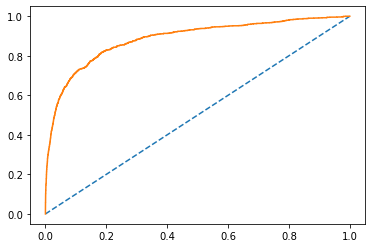

In [127]:
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

## AUC and ROC for the test data

In [128]:
probs = LR_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

AUC: 0.885


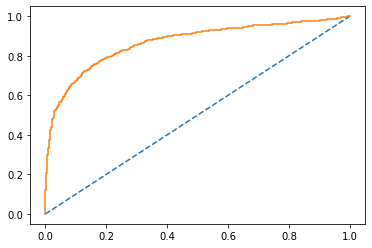

In [129]:
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Confusion Matrix for the training data

In [130]:
confusion_matrix(y_train, ytrain_predict)

array([[6344,  211],
       [ 646,  681]], dtype=int64)

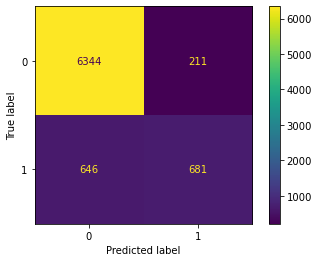

In [131]:
plot_confusion_matrix(LR_model,X_train,y_train);

## Confusion Matrix for test data

In [132]:
confusion_matrix(y_test, ytest_predict)

array([[2731,   78],
       [ 286,  283]], dtype=int64)

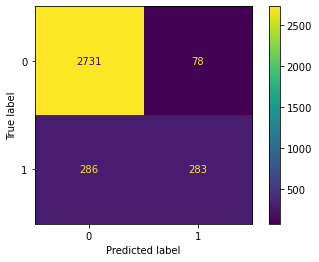

In [133]:
plot_confusion_matrix(LR_model,X_test,y_test);

## Classification report for the training data

In [134]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.76      0.51      0.61      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.74      0.78      7882
weighted avg       0.88      0.89      0.88      7882



## Classification report for the test data

In [135]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2809
           1       0.78      0.50      0.61       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378



## Applying GridSearchCV for Logistic Regression

In [136]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [137]:
model = LogisticRegression(max_iter=7000,n_jobs=-1)

In [138]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [139]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=7000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [140]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=7000, n_jobs=-1, penalty='none')


In [141]:
best_model = grid_search.best_estimator_

In [142]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [143]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.978354,0.021646
1,0.993408,0.006592
2,0.893563,0.106437
3,0.988342,0.011658
4,0.385695,0.614305


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.76      0.51      0.61      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.74      0.77      7882
weighted avg       0.88      0.89      0.88      7882
 



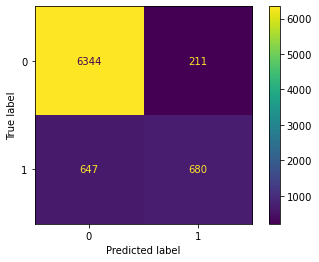

In [144]:
## Confusion matrix on the training data
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2809
           1       0.78      0.50      0.61       569

    accuracy                           0.89      3378
   macro avg       0.84      0.74      0.78      3378
weighted avg       0.89      0.89      0.88      3378
 



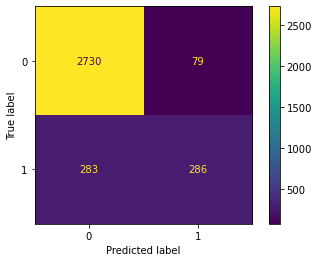

In [145]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

# 2.Random Forest Model

In [146]:
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(X_train, y_train)

In [147]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [100]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)


In [148]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [100]})

In [149]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 100}

In [150]:
best_grid = grid_search.best_estimator_

In [151]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Confusion Matrix for the training data

In [152]:
confusion_matrix(y_train,ytrain_predict)

array([[6420,  135],
       [ 733,  594]], dtype=int64)

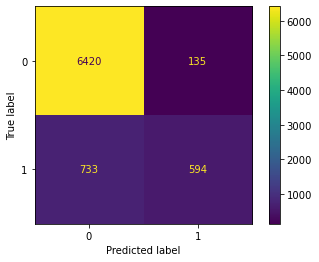

In [153]:
plot_confusion_matrix(best_grid,X_train,y_train)

## Confusion Matrix for the test data

In [154]:
confusion_matrix(y_test,ytest_predict)

array([[2766,   43],
       [ 319,  250]], dtype=int64)

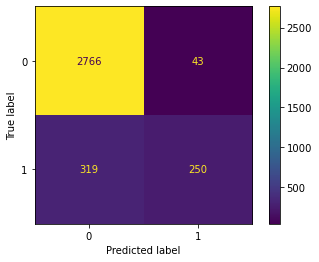

In [155]:
plot_confusion_matrix(best_grid,X_test,y_test)

## Classification report for the training data

In [156]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6555
           1       0.81      0.45      0.58      1327

    accuracy                           0.89      7882
   macro avg       0.86      0.71      0.76      7882
weighted avg       0.88      0.89      0.88      7882



## Classification report for the test data

In [157]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2809
           1       0.85      0.44      0.58       569

    accuracy                           0.89      3378
   macro avg       0.87      0.71      0.76      3378
weighted avg       0.89      0.89      0.88      3378



## AUC and ROC for the training data

AUC: 0.931


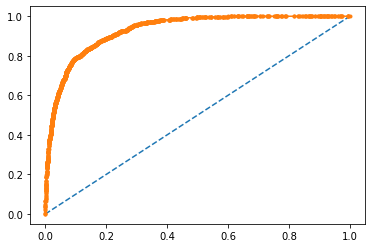

In [158]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## AUC and ROC for the test data

AUC: 0.915


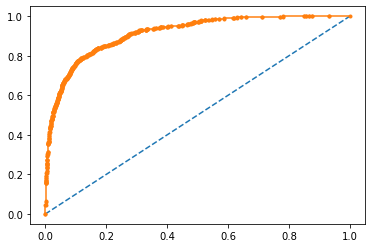

In [159]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# 3.Decision Tree Model-CART

In [160]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

## Predicting on Training and Test dataset

In [162]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [163]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (7882,)
ytest_predict (3378,)


## Getting the Predicted Classes and Probs

In [164]:
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [165]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.98615118, 0.01384882],
       [0.66666667, 0.33333333],
       [0.99068323, 0.00931677],
       ...,
       [0.98615118, 0.01384882],
       [0.66666667, 0.33333333],
       [0.92727273, 0.07272727]])

In [166]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.986151,0.013849
1,0.666667,0.333333
2,0.990683,0.009317
3,0.986151,0.013849
4,0.000000,1.000000


## Model Evaluation

In [167]:
# Accuracy - Training Data
reg_dt_model.score(X_train, y_train)

0.9133468662775945

## AUC and ROC for the training data

AUC: 0.944


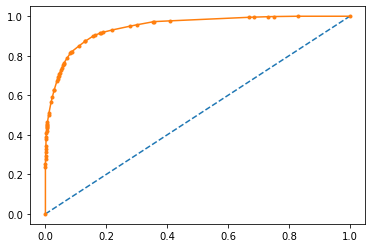

In [168]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## AUC and ROC for the test data

AUC: 0.918


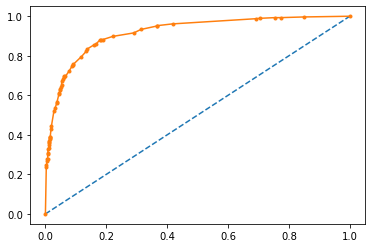

In [169]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Confusion Matrix for the training data

In [170]:
confusion_matrix(y_train, ytrain_predict)

array([[6364,  191],
       [ 492,  835]], dtype=int64)

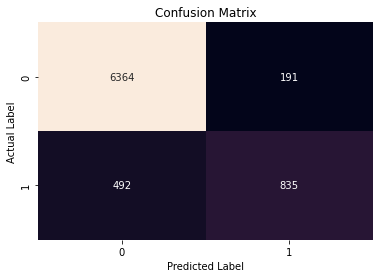

In [171]:
confusion_matrix(y_train, ytrain_predict)
sns.heatmap(confusion_matrix(y_train, ytrain_predict), annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

## Confusion Matrix for the test data

In [172]:
confusion_matrix(y_test, ytest_predict)

array([[2703,  106],
       [ 248,  321]], dtype=int64)

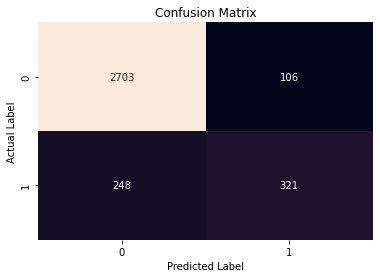

In [173]:
confusion_matrix(y_test, ytest_predict)
sns.heatmap(confusion_matrix(y_test, ytest_predict), annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

## Classification report for the training data

In [174]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6555
           1       0.81      0.63      0.71      1327

    accuracy                           0.91      7882
   macro avg       0.87      0.80      0.83      7882
weighted avg       0.91      0.91      0.91      7882



## Classification report for the test data

In [175]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2809
           1       0.75      0.56      0.64       569

    accuracy                           0.90      3378
   macro avg       0.83      0.76      0.79      3378
weighted avg       0.89      0.90      0.89      3378



# 4.KNN Model

In [176]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [177]:
## Performance Matrix on train data set
ytrain_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

0.9209591474245116
[[6379  176]
 [ 447  880]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6555
           1       0.83      0.66      0.74      1327

    accuracy                           0.92      7882
   macro avg       0.88      0.82      0.85      7882
weighted avg       0.92      0.92      0.92      7882



In [178]:
## Performance Matrix on test data set
ytest_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

0.8744819419775015
[[2690  119]
 [ 305  264]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2809
           1       0.69      0.46      0.55       569

    accuracy                           0.87      3378
   macro avg       0.79      0.71      0.74      3378
weighted avg       0.86      0.87      0.86      3378



In [179]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [180]:
## Performance Matrix on train data set
ytrain_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

0.903577772139051
[[6394  161]
 [ 599  728]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6555
           1       0.82      0.55      0.66      1327

    accuracy                           0.90      7882
   macro avg       0.87      0.76      0.80      7882
weighted avg       0.90      0.90      0.90      7882



In [181]:
## Performance Matrix on test data set
ytest_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

0.8706335109532267
[[2704  105]
 [ 332  237]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      2809
           1       0.69      0.42      0.52       569

    accuracy                           0.87      3378
   macro avg       0.79      0.69      0.72      3378
weighted avg       0.86      0.87      0.86      3378



In [182]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.09029011249259922,
 0.11870929544108944,
 0.1255180580224985,
 0.12936648904677328,
 0.1308466548253404,
 0.12966252220248664,
 0.13114268798105388,
 0.13676731793960928,
 0.1346950858496152,
 0.13617525162818234]

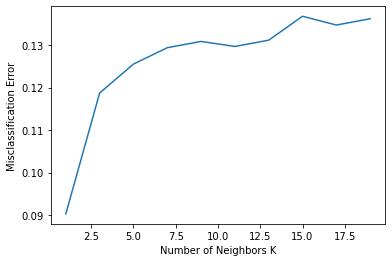

In [183]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [184]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [185]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9509007866023852
[[6412  143]
 [ 244 1083]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6555
           1       0.88      0.82      0.85      1327

    accuracy                           0.95      7882
   macro avg       0.92      0.90      0.91      7882
weighted avg       0.95      0.95      0.95      7882



AUC: 0.944


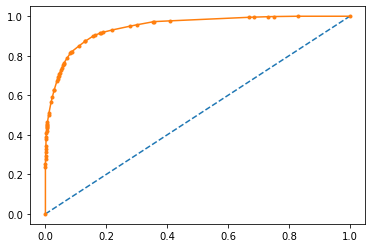

In [186]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [187]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8812907045589106
[[2658  151]
 [ 250  319]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2809
           1       0.68      0.56      0.61       569

    accuracy                           0.88      3378
   macro avg       0.80      0.75      0.77      3378
weighted avg       0.87      0.88      0.88      3378



AUC: 0.918


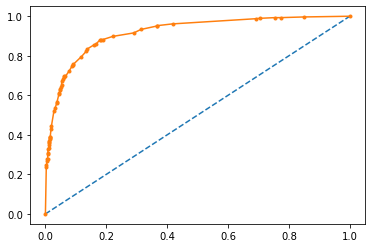

In [188]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [189]:
0.9509007866023852-0.8812907045589106

0.06961008204347463

As the difference between train and test accuracies is less than 10%, it is a valid model

# 5.Bagging

In [190]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [191]:
## Performance Matrix on train data set
ytrain_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

1.0
[[6555    0]
 [   0 1327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



AUC: 0.944


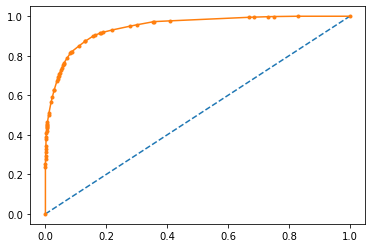

In [192]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [193]:
## Performance Matrix on test data set
ytest_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

0.9650680876258141
[[2779   30]
 [  88  481]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2809
           1       0.94      0.85      0.89       569

    accuracy                           0.97      3378
   macro avg       0.96      0.92      0.93      3378
weighted avg       0.96      0.97      0.96      3378



AUC: 0.918


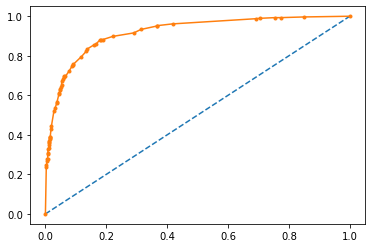

In [194]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Bagging is a good model.

# APPLYING SMOTE

## Bagging with SMOTE

In [195]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train_res, y_train_res)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [196]:
## Performance Matrix on train data set
ytrain_predict = Bagging_model.predict(X_train_res)
model_score =Bagging_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, ytrain_predict))
print(metrics.classification_report(y_train_res, ytrain_predict))

1.0
[[6555    0]
 [   0 6555]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110



In [197]:
## Performance Matrix on test data set
ytest_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

0.9600355239786856
[[2758   51]
 [  84  485]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2809
           1       0.90      0.85      0.88       569

    accuracy                           0.96      3378
   macro avg       0.94      0.92      0.93      3378
weighted avg       0.96      0.96      0.96      3378



In [198]:
1.0-0.9600355239786856

0.039964476021314366

## KNN with Smote

In [199]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train_res,y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [200]:
## Performance Matrix on train data set
ytrain_predict = KNN_model.predict(X_train_res)
model_score = KNN_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, ytrain_predict))
print(metrics.classification_report(y_train_res, ytrain_predict))

0.9647597254004576
[[6104  451]
 [  11 6544]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      6555
           1       0.94      1.00      0.97      6555

    accuracy                           0.96     13110
   macro avg       0.97      0.96      0.96     13110
weighted avg       0.97      0.96      0.96     13110



In [201]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8555358200118414
[[2413  396]
 [  92  477]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2809
           1       0.55      0.84      0.66       569

    accuracy                           0.86      3378
   macro avg       0.75      0.85      0.78      3378
weighted avg       0.89      0.86      0.87      3378



In [202]:
0.9647597254004576-0.8555358200118414

0.10922390538861626